# Foundations of Machine Learning Series

## Life Expectancy

In [1]:
# imports

from IPython.display import Image

import pandas as pd
import pickle
import statsmodels.api as sm

In [2]:
# constants

PREPARATION_PATH='data/preparation/'
PRESENTATION_PATH='data/presentation/'

## The Dataset

Kaggles Life Expectancy dataset from WHO is presented.

To start with, we evaluate the statistical significance of the parameters in this dataset

In [3]:
model_sm = sm.load(PRESENTATION_PATH + 'statistical_sig.pkl')
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     313.4
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:19:51   Log-Likelihood:                -3785.5
No. Observations:                1319   AIC:                             7601.
Df Residuals:                    1304   BIC:                             7679.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              55.7628      0.606     91.959      0.000      54.573      56.952
Alcohol                            -0.4385      0.486     -0.902      0.367      -1.393       0.516
Hepatitis B                        -1.3529      0.597     -2.267      0.024      -2.524      -0.182
Measles                             1.0172      0.349      2.917      0.004       0.333       1.701
 BMI                                4.6184      0.616      7.498      0.000       3.410       5.827
under-five deaths                  -2.1619      0.456     -4.740      0.000      -3.057      -1.267
Polio                               2.4011      0.649      3.700      0.000       1.128       3.674
Total expenditure                   1.6499      0.539      3.062      0.002       0.593       2.707
Diphtheria                          3.0742      0.790      3.891      0.000       1.524       4.624
 HIV/AIDS                          -7.0805      0.244    -28.963      0.000      -7.560      -6.601
GDP                                 3.1932      0.412      7.754      0.000       2.385       4.001
Population                          0.8285      0.305      2.719      0.007       0.231       1.426
 thinness  1-19 years               0.2721      1.031      0.264      0.792      -1.750       2.294
 thinness 5-9 years                -0.9887      1.030     -0.960      0.337      -3.009       1.032
Income composition of resources    18.6734      0.836     22.333      0.000      17.033      20.314
==============================================================================
Omnibus:                       94.737   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.075
Skew:                           0.407   Prob(JB):                     2.45e-51
Kurtosis:                       4.891   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After evaluating the OLS results above I determined that several features were not significant enough to include in this linear regression model. For example, thinness columns were left out.

Several additional preprocessing steps were taken: the removal of categories that provided little value, the removal of rows with NaN values, and so on.

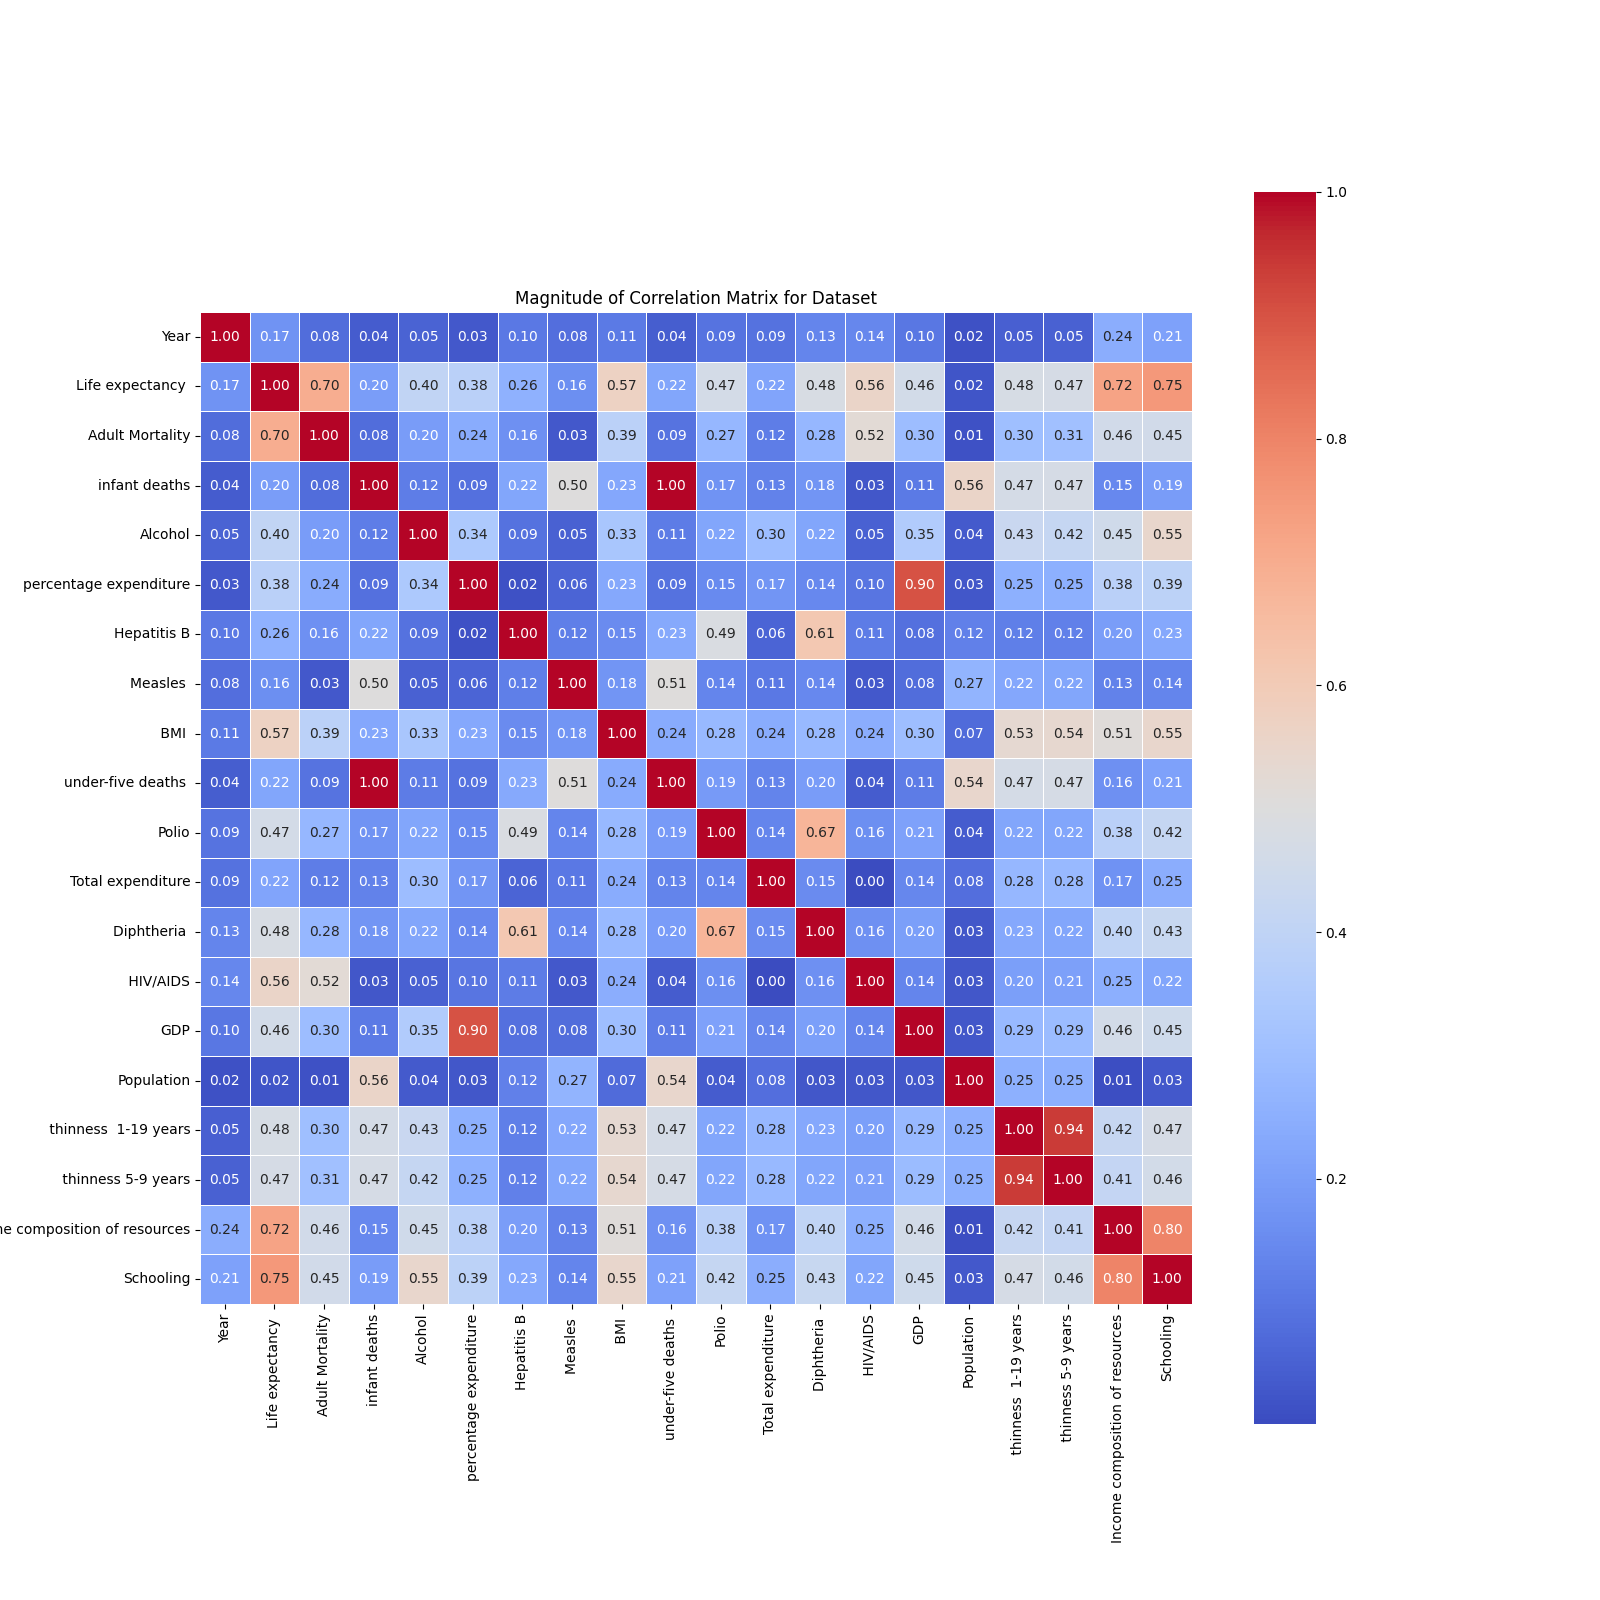

In [12]:
Image(filename=PREPARATION_PATH + 'correlation_matrix_magnitude.png')

Removing highly correlated columns was a big part of refining the accuracy of the model as well.

## Life expectancy distribution

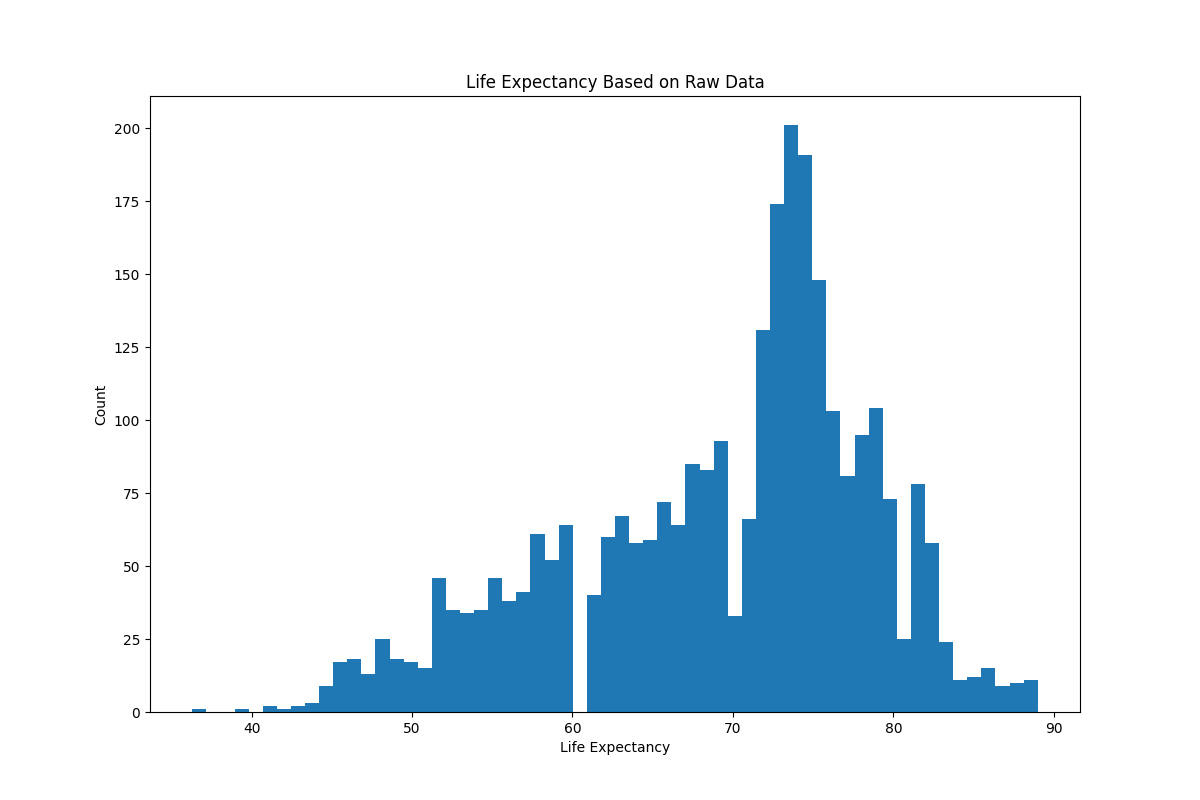

In [4]:
Image(filename=PREPARATION_PATH + 'Life expectancy, raw.png')

In [5]:
pd.read_csv(PRESENTATION_PATH + 'life_expectancy_dist.csv')

,Unnamed: 0,Life expectancy
0,count,1649.000000
1,mean,69.302304
2,std,8.796834
3,min,44.000000
4,25%,64.400000
5,50%,71.700000
6,75%,75.000000
7,max,89.000000


The above distribution demonstrates that most of the world tends to have expectancies between 70 and 80 years old with a wide range of values.

## The Model

After modeling the linear regression for this the model can reasonably predict the life expectancy of a country using only the following columns.

In [10]:
with open(PRESENTATION_PATH + 'x_columns.pkl', 'rb') as file:
    x_columns = pickle.load(file)
x_columns.to_list()

['Alcohol',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 'Income composition of resources',
 'Status_Developing']

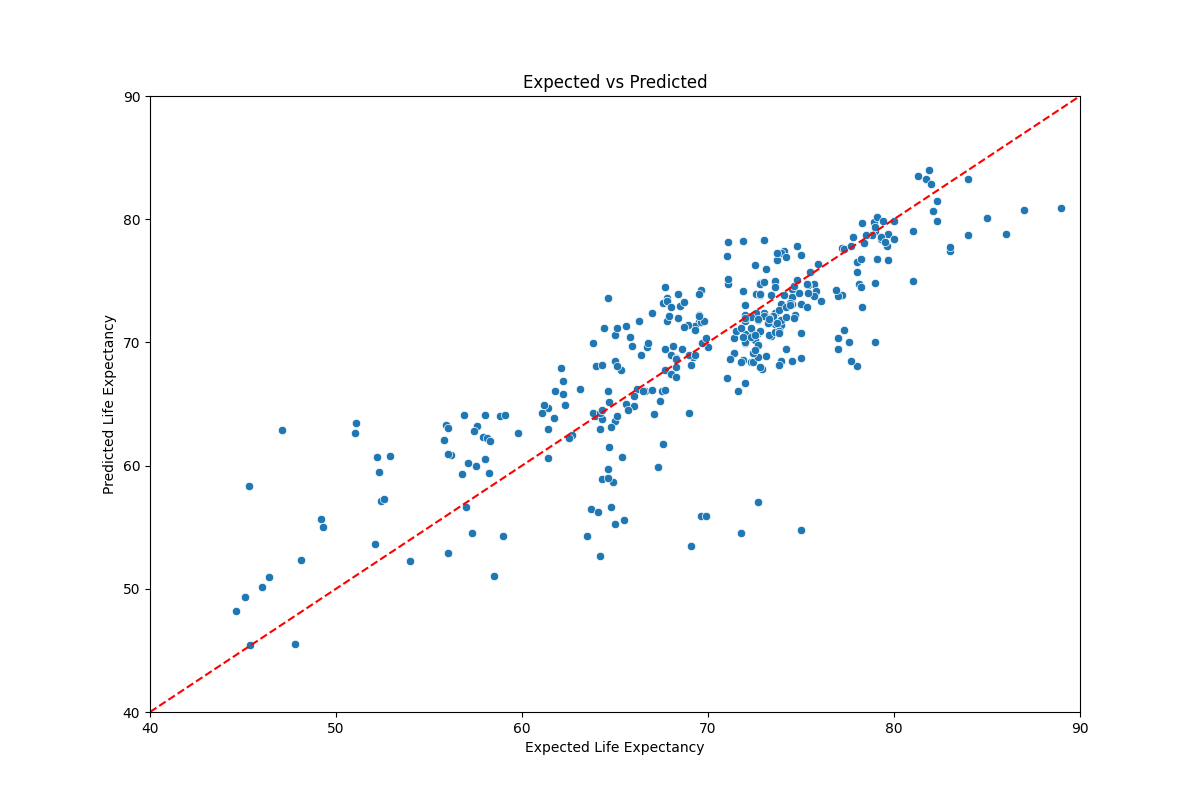

In [11]:
Image(filename=PRESENTATION_PATH + 'expected_vs_predicted.png')

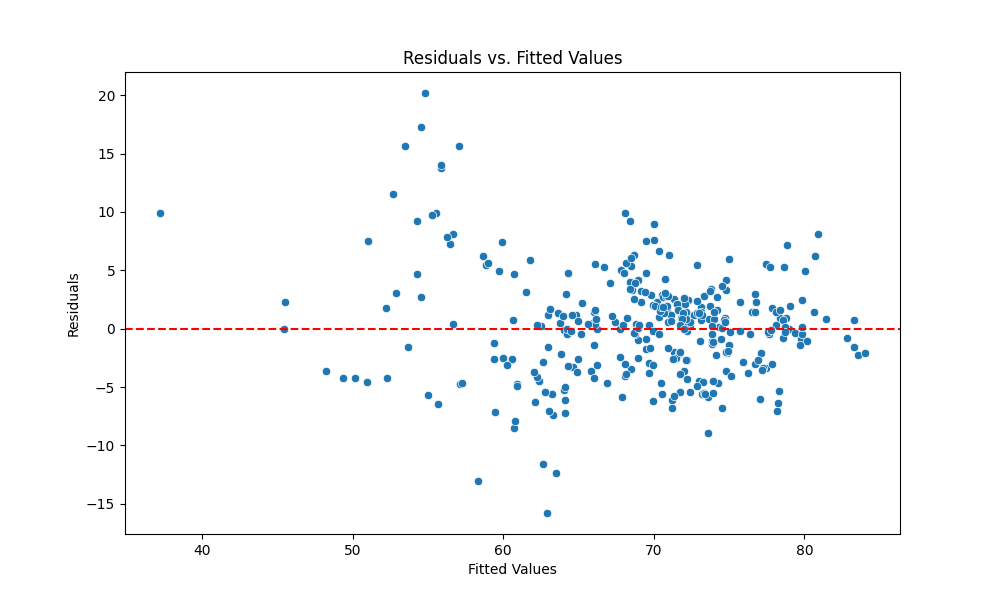

In [7]:
Image(filename=PRESENTATION_PATH + 'residuals.png')

## Results

The final model was able to predict the life expectancy of a country with an absolute mean error of 3.41 years on average.

The columns that influenced this model the most are listed below in descending order.

In [14]:
pd.read_csv(PRESENTATION_PATH + 'feature_importance.csv')[['Feature', 'Coefficient']]

,Feature,Coefficient
0,Income composition of resources,18.452850
1,HIV/AIDS,7.006615
2,BMI,4.978960
3,Diphtheria,3.130724
4,GDP,2.628449
5,Polio,2.400598
6,under-five deaths,2.335477
7,Status_Developing,2.320551
8,Hepatitis B,1.577469
9,Total expenditure,1.562465


It's no surprise that income has a dramatic impact on the final result, and so does HIV/AIDS and BMI.